In [1]:
from RADAR_set_up import *

import pandas as pd
import matplotlib.pyplot as plt

import regex as re

/home/nicole/miniconda3/envs/radar_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


detector and tokeniser successfully loaded


#### Read Data

In [3]:
post_RADAR_data = pd.read_csv('topics-post-RADAR-data.csv')

#### Paragraph Distribution

In [5]:
STUD_paragraph_counts = []

for text in post_RADAR_data['Student']:
    text = text.strip('/n')
    STUD_paragraph_counts.append(text.count('\n')); 

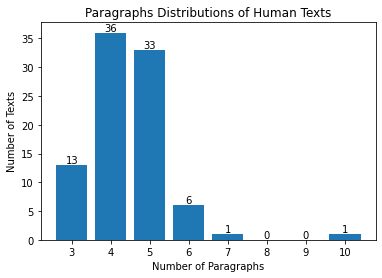

In [6]:
x = [i for i in range(3,11)]
y = [STUD_paragraph_counts.count(i) for i in range(3,11)]
f = plt.bar(x, y)

plt.title('Paragraphs Distributions of Human Texts')
plt.xlabel('Number of Paragraphs')
plt.ylabel('Number of Texts')

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

#### Making DF for Text Length Exploration

In [8]:
post_RADAR_data.head(1)

,id,File,Topic,Student,Student_Reformatted,Grammarly_Score,STUD_Grammarly_Red,STUD_Grammarly_All,ChatGPT-3,ChatGPT-4,...,STUD_REFORMATTED,STUD_RED_RADAR,STUD_ALL_RADAR,GPT3_RADAR,GPT4_RADAR,GPT4_Quillbot_RADAR,GPT4_Grammarly_RADAR,GPT4_WordAI_RADAR,GPT4_Paraphrasing_IO_RAW_RADAR,GPT4_Paraphrasing_IO_EDITED_RADAR
0,0,essay01.txt,Should students be taught to compete or to coo...,It is always said that competition can effecti...,It is always said that competition can effecti...,75,It is always said that competition can effecti...,It is always said that competition can effecti...,Education is not only about acquiring knowledg...,Title: Fostering Cooperation and Competition i...,...,0.519651,0.712787,0.704968,0.986301,0.974493,0.975968,0.963674,0.843616,0.989108,0.983982


In [9]:
text_length_data = []
for text_index, text in enumerate(post_RADAR_data['Student']):
    text = text.strip('\n')
    paragraphs = text.split('\n')
    curr = ""
    for para_index, para in enumerate(paragraphs):
        curr = curr + '\n' + para
        text_length_data.append(
            {
                'text_id': text_index,
                'pre_processed_text' : curr.strip('\n'),
                'paragraph_id' : para_index,
                'word_count' : len(re.findall(r'\b\w+\b', curr)),
            }
        )
text_length_data = pd.DataFrame(text_length_data)


In [10]:
text_length_data.head(1)

,text_id,pre_processed_text,paragraph_id,word_count
0,0,It is always said that competition can effecti...,0,84


#### Getting RADAR Outputs

In [11]:
radarOutputs = [getRADARoutput(text) for text in text_length_data['pre_processed_text']]

KeyboardInterrupt: 

In [ ]:
text_length_data['RADAR_outputs'] = radarOutputs

#### Exporting Resulting Data

In [ ]:
text_length_data.to_csv('topics-length-specific-RADAR.csv', index=False)